In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from peak_detection import detect_peaks_rust_locally_exclusive_on_chunk

In [3]:
import spikeinterface.full as si
# import spikeinterface.sortingcomponents.peak_detection as pkd
import numpy as np
import time



# import sys
# sys.path.append("/home/samuel/Documents/SpikeInterface/spikeinterface_rust/Python/spikeinterface_files")
from main_detect import detect_peaks

In [29]:
job_kwargs={"n_jobs": 4, "mp_context": "fork", "pool_engine":"process", "progress_bar": True, "chunk_duration":"1s"}

# rec, sorting = si.generate_ground_truth_recording(durations=[100],num_channels=384,sampling_frequency=25000.0,num_units=100, seed=2205)
rec, sorting = si.generate_ground_truth_recording(durations=[100],num_channels=60,sampling_frequency=25000.0,num_units=50, seed=2205)
# rec, sorting = si.generate_ground_truth_recording(durations=[10],num_channels=10,sampling_frequency=25000.0,num_units=25, seed=2406)
rec = rec.save_to_memory(**job_kwargs, sharedmem=True)


write_memory_recording (workers: 4 processes):   0%|          | 0/100 [00:00<?, ?it/s]

In [30]:

# job_kwargs={"n_jobs": 4, "mp_context": "fork", "pool_engine":"process", "progress_bar": True, "chunk_duration":"1s"}
job_kwargs={"n_jobs": 1, "mp_context": "fork", "pool_engine":"process", "progress_bar": True, "chunk_duration":"1s"}
# job_kwargs={"n_jobs": 4, "mp_context": "fork", "pool_engine":"thread", "progress_bar": True, "chunk_duration":"1s"}

peaks_numba = detect_peaks(rec, method="locally_exclusive", method_kwargs={"engine": "numba"}, job_kwargs=job_kwargs)

peaks_rust = detect_peaks(rec, method="locally_exclusive", method_kwargs={"engine": "rust"}, job_kwargs=job_kwargs)


print(peaks_numba.size, peaks_rust.size, np.array_equal(peaks_numba, peaks_rust))

noise_level (no parallelization):   0%|          | 0/20 [00:00<?, ?it/s]

detect peaks (locally_exclusive) (no parallelization):   0%|          | 0/100 [00:00<?, ?it/s]

detect peaks (locally_exclusive) (no parallelization):   0%|          | 0/100 [00:00<?, ?it/s]

61382 61336 False


In [27]:
print(peaks_numba.size, peaks_rust.size, np.array_equal(peaks_numba, peaks_rust))
print(peaks_numba[:10])
print(peaks_rust[:10])
print(peaks_numba[-10:-1])
print(peaks_rust[-10:-1])

2728 2728 True
[( 16, 4, -224.69271851, 0) ( 72, 2,  -95.86917114, 0)
 (188, 6, -373.27490234, 0) (391, 4, -129.30857849, 0)
 (527, 5,  -82.7456131 , 0) (562, 5, -241.02589417, 0)
 (608, 6, -117.98226929, 0) (745, 6, -372.23910522, 0)
 (781, 0,  -69.1603775 , 0) (840, 3, -316.89825439, 0)]
[( 16, 4, -224.69271851, 0) ( 72, 2,  -95.86917114, 0)
 (188, 6, -373.27490234, 0) (391, 4, -129.30857849, 0)
 (527, 5,  -82.7456131 , 0) (562, 5, -241.02589417, 0)
 (608, 6, -117.98226929, 0) (745, 6, -372.23910522, 0)
 (781, 0,  -69.1603775 , 0) (840, 3, -316.89825439, 0)]
[(249308, 2,  -93.77159882, 0) (249423, 0,  -44.13046646, 0)
 (249445, 7, -342.42999268, 0) (249488, 3, -149.24220276, 0)
 (249578, 3, -314.54605103, 0) (249623, 1,  -49.23684692, 0)
 (249657, 7, -398.69207764, 0) (249773, 4,  -51.54003143, 0)
 (249837, 5,  -37.90432358, 0)]
[(249308, 2,  -93.77159882, 0) (249423, 0,  -44.13046646, 0)
 (249445, 7, -342.42999268, 0) (249488, 3, -149.24220276, 0)
 (249578, 3, -314.54605103, 0) (249

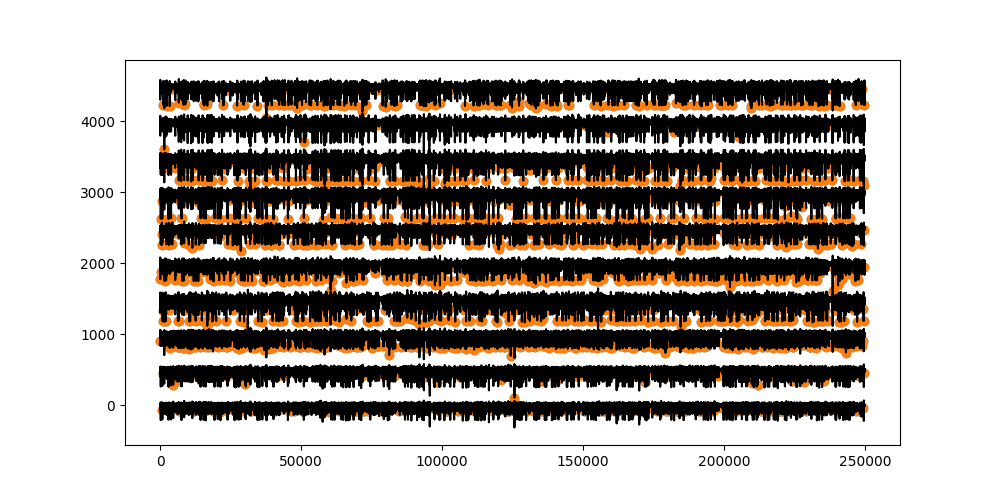

In [28]:
%matplotlib widget
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(10, 5))
chan_offset = 500
traces = rec.get_traces().copy()
traces += np.arange(traces.shape[1])[None, :] * chan_offset
ax.plot(traces, color="k")

labels = ["rust","numba",  ]
peaks_methods = [peaks_rust, peaks_numba, ]

for count, peaks in enumerate(peaks_methods):
    sample_inds, chan_inds, amplitudes = peaks["sample_index"], peaks["channel_index"], peaks["amplitude"]
    ax.scatter(sample_inds, chan_inds * chan_offset + amplitudes, label=labels[count])

# ax.legend()



In [8]:
np.setdiff1d(peaks_numba, peaks_rust)

array([],
      dtype=[('sample_index', '<i8'), ('channel_index', '<i8'), ('amplitude', '<f8'), ('segment_index', '<i8')])

In [9]:
# for i in range(1,4):
#     job_kwargs={"n_jobs": -1, "mp_context": "fork", "pool_engine":"thread", "progress_bar": False, "chunk_duration": str(500*i) +"ms"}
#     print("Chunk duration :" + str(500*i) +" ms")
#     %timeit pkd.detect_peaks(rec, method="locally_exclusive", method_kwargs={"engine": "rust"}, job_kwargs=job_kwargs)

In [10]:
for i in range(1,4):
    job_kwargs={"n_jobs": -1, "mp_context": "fork", "pool_engine":"thread", "progress_bar": False, "chunk_duration": str(500*i) +"ms"}
    print("Chunk duration :" + str(500*i) +" ms")
    %timeit pkd.detect_peaks(rec, method="locally_exclusive", method_kwargs={"engine": "numba"}, job_kwargs=job_kwargs)

Chunk duration :500 ms


NameError: name 'pkd' is not defined